**Car Price Prediction**

So we have a dataset of CarDekho wherein we have to predict the price of used cars. 

I'm going to use **Random Forest Regressor.** And for better accuracy I used Decision Tree Regressor.

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [2]:
df = pd.read_csv('cardekho_data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Analysing the Dataset

In [4]:
df.shape

(301, 9)

In [5]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [6]:
df.Seller_Type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [7]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [8]:
df.Owner.unique()

array([0, 1, 3])

In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
df['current_year']=2021

In [12]:
df['no. of years'] = df['current_year']-df['Year']

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no. of years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [14]:
df.drop(['Car_Name','Year','current_year'],axis=1,inplace=True)

In [15]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no. of years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [16]:
df=pd.get_dummies(df)

In [17]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no. of years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,7,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,8,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,4,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,10,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,7,0,1,0,1,0,0,1


In [18]:
df.drop(['Fuel_Type_CNG','Seller_Type_Dealer','Transmission_Automatic'],axis=1,inplace=True)

In [19]:
df.tail()

,Selling_Price,Present_Price,Kms_Driven,Owner,no. of years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
296,9.50,11.6,33988,0,5,1,0,0,1
297,4.00,5.9,60000,0,6,0,1,0,1
298,3.35,11.0,87934,0,12,0,1,0,1
299,11.50,12.5,9000,0,4,1,0,0,1
300,5.30,5.9,5464,0,5,0,1,0,1


In [20]:
df.shape

(301, 9)

Correlation matrix using Pairplot

In [21]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no. of years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no. of years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


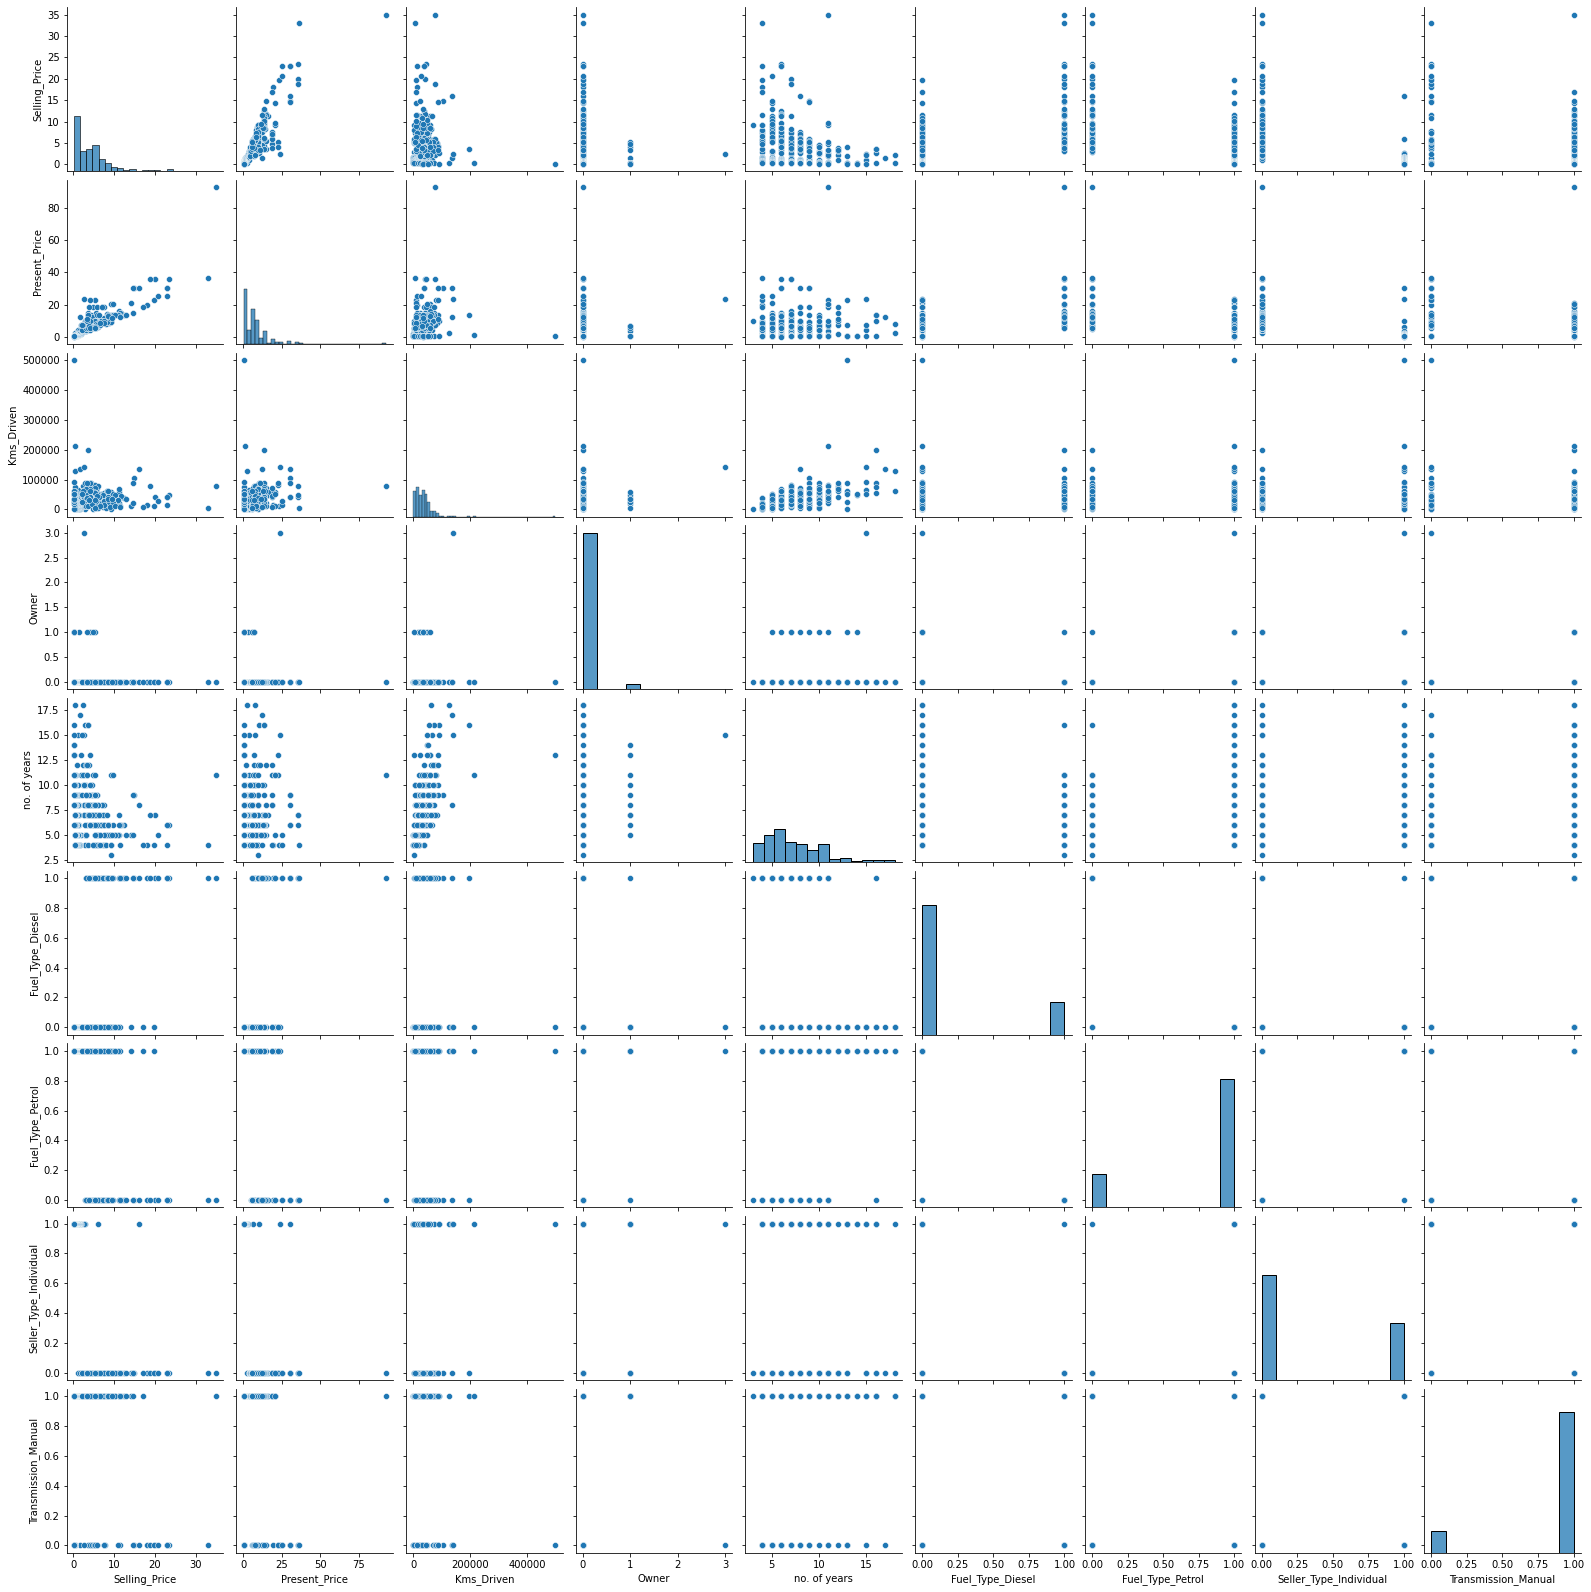

In [22]:
sns.pairplot(df)

Insights from Pairplot:


*   Positive Correlation between current price and selling price.
*   Selling price decreases when use of car increases and kilometer increases.

*   Collinearity between No. of years and No. of Kilometer
*   List item





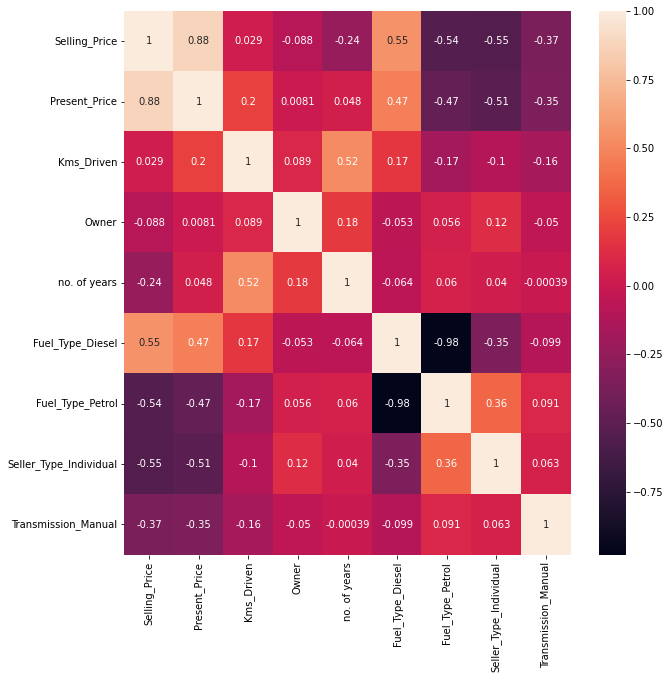

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [24]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

Feature Selection

In [25]:
from sklearn.ensemble import ExtraTreesRegressor

In [26]:
model = ExtraTreesRegressor()
feat_imp = model.fit(x,y)
feat_imp.feature_importances_

array([0.35328517, 0.04353128, 0.00052098, 0.0726039 , 0.23793508,
       0.00975447, 0.12642648, 0.15594265])

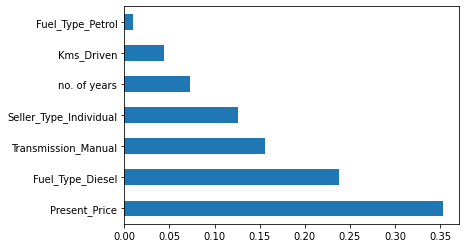

In [27]:
imp = pd.Series(feat_imp.feature_importances_, index=x.columns)
imp.nlargest(7).plot(kind='barh')

Split the Data

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=8)

Using Random Forest Regressor Model

In [29]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

Train the model

In [30]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [31]:
y_pred = regressor.predict(x_test)

Making Predictions and Checking Accuracy

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8705213015281357

Predictions are 87.05% accurate.

For Better Accuracy let's try Decision Tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor
regressor1 = DecisionTreeRegressor()

In [37]:
regressor1.fit(x_train,y_train)

DecisionTreeRegressor()

In [38]:
ypred = regressor1.predict(x_test)

In [39]:
ypred

array([ 8.25,  4.95,  3.15,  0.42,  3.1 ,  4.5 ,  4.15,  1.05, 10.9 ,
        0.18,  3.51,  1.2 ,  1.35,  4.5 , 14.9 ,  0.48,  0.1 ,  6.  ,
        1.2 ,  0.4 ,  4.5 ,  5.25,  0.6 ,  2.5 ,  1.05, 23.  ,  5.2 ,
        4.75,  3.5 ,  5.5 ,  0.48,  0.42,  5.25,  0.75, 18.75,  2.85,
        2.85,  3.  ,  5.8 ,  8.55,  1.05,  9.25,  3.65, 11.25,  2.9 ,
        4.5 ,  0.55,  8.5 , 17.  ,  3.1 ,  0.6 ,  5.75,  2.9 , 10.9 ,
        5.75,  5.9 ,  5.25,  1.2 ,  0.9 ,  9.25,  2.5 ])

In [41]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [42]:
r2_score(y_test,ypred)

0.893661920984533

Predictions are 89.37% accurate.